## My First Data Science Project

# Analyzing Data

### Prison Helicopter Escapes

We begin by importing some helper functions

In [10]:
from helper import *

## Get the Data 

Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [11]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
data = data_from_url(url)

###### 1. Let's print the first three rows

In [12]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired t

###### 2.Most of the space on the screen is taken by the last element, the "Details" column. To make it easier to look at our data, we're going to get rid of it

In [13]:
index = 0

for row in data:
    data[index] = row[:-1]
    index += 1

print(data[:4])
    



[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson'], ['February 27, 1981', 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard DupréDaniel Beaumont']]


##### 3. We'll modify the date column to only include the year. To this end we'll use the helper function fetch_year()

In [14]:
for row in data:
    row[0] = fetch_year(row[0])

print(data[:4])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson'], [1981, 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard DupréDaniel Beaumont']]


##### 4. We want to have the number of attempts that ocurred at that year by creating a list of lists where each list has two elements:
##### a. A year
##### b.How many attempts occurred in the corresponding year

We will begin by creating a list whose elements all look like [year, 0]

In [15]:
#the earliest and latest years in data
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

#list of all the years from min_year to max_year
years = []
for year in range(min_year, max_year + 1):
    years.append(year)
    
    
attempts_per_year = []
for row in years:
    row = [row,0]
    attempts_per_year.append(row)

print(attempts_per_year)


[[1971, 0], [1972, 0], [1973, 0], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 0], [1979, 0], [1980, 0], [1981, 0], [1982, 0], [1983, 0], [1984, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0], [1990, 0], [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


##### We can now determine how many attempts there were in each year and answer one of our starting questions:

#In which year did the most attempts at breaking out of prison with a helicopter occur?

In [16]:
for row in data:
    for year_attempt in attempts_per_year:
        year = year_attempt[0]
        if row[0] == year:
            year_attempt[1] += 1

print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


#. . . from the previous output, it would be better if we could visualize it in a friendlier way

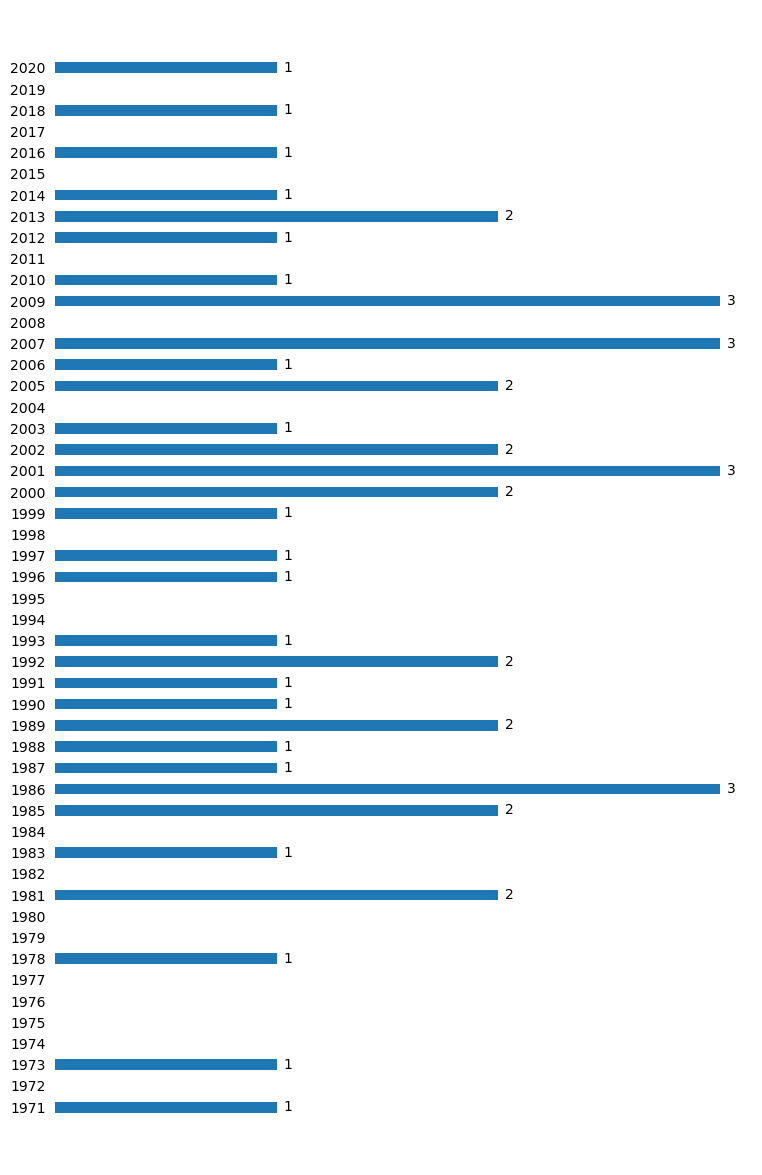

In [17]:
%matplotlib inline
barplot(attempts_per_year)

## In which year did the most attempts at breaking out of prison with a helicopter occur? 
#### Answer: 1986, 2001, 2007 and 2009

In [18]:
#In which countries do the most attempted helicopter prison escapes occur?
countries_frequency = df["Country"].value_counts()
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Canada,4
Greece,4
Belgium,4
Australia,2
Brazil,2
United Kingdom,2
Mexico,1
Ireland,1
